# Project: Logistic Regression
### by Samuel Sovi

In this project I will be attempting to use the max temperature of a given day, the amount of precipitation and the wind speed to predict whether the minimum temperature is realtively cold or hot.

**Additional note**: a large portion of the code was taken from my Sept16 Project

##### Imports:
I imported pandas for DataFrame access, numpy for calculations and arrays, tabulate for creating tables, LogisticRegression for fitting and predicting and matplotlib.pyplot and seaborn for graphing

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

I once again decided to use a github raw csv link for my data which I got from MeteoStat's API on RapidAPI last semester.

In [ ]:
data_url = "https://raw.githubusercontent.com/samps7/CSPC323_Files/main/weather_cleaned.csv"

data_df = pd.read_csv(data_url)


In [ ]:
print("original data")
print(data_df)

original data
           date  tavg  tmin  tmax   prcp   wdir  wspd    pres
0    2021-02-21  52.5  42.1  64.0  0.000  344.0   4.2  1030.0
1    2021-02-22  56.5  45.0  72.0  0.000  354.0   3.6  1025.0
2    2021-02-23  59.5  46.0  78.1  0.000  337.0   5.0  1020.0
3    2021-02-24  57.6  43.0  71.1  0.000  351.0   6.8  1021.7
4    2021-02-25  56.7  46.9  66.9  0.000  321.0   9.2  1023.7
..          ...   ...   ...   ...    ...    ...   ...     ...
360  2022-02-16  57.6  44.6  69.8  0.000  317.0   8.8  1017.4
361  2022-02-17  58.1  48.2  68.0  0.000  295.0   5.3  1024.8
362  2022-02-18  54.3  42.8  68.0  0.000  155.0   4.3  1024.3
363  2022-02-19  56.7  44.6  69.8  0.000  317.0   4.4  1019.8
364  2022-02-20  51.8  42.8  62.6  0.004  330.0   6.5  1015.4

[365 rows x 8 columns]


Next, I randomize the order of my data set so that I can perform more accurate random sampling for my Linear Regression model

In [ ]:

# randomize the order of data for more accurate random sampling
data_df = data_df.sample(frac=1).reset_index(drop=True)
print(data_df)

           date  tavg  tmin  tmax   prcp   wdir  wspd    pres
0    2021-08-07  69.3  61.0  82.0  0.000  330.0   6.6  1011.6
1    2021-06-28  65.3  59.0  75.0  0.000  335.0   8.7  1009.7
2    2021-07-21  66.6  57.0  77.0  0.000  325.0   6.6  1013.5
3    2022-02-13  60.6  48.2  78.8  0.000  355.0   3.5  1022.4
4    2021-06-05  64.9  52.0  80.1  0.000  326.0   7.1  1012.5
..          ...   ...   ...   ...    ...    ...   ...     ...
360  2021-12-07  53.2  46.4  57.2  0.028  210.0   4.0  1015.8
361  2021-10-21  67.8  63.0  75.0  0.000  168.0   8.7  1018.1
362  2022-01-28  51.4  39.2  66.2  0.000  180.0   3.3  1024.7
363  2021-05-27  61.0  50.0  71.1  0.000  353.0   6.3  1019.4
364  2021-11-25  52.9  41.0  69.1  0.000   11.0   2.8  1026.7

[365 rows x 8 columns]


I start collecting my data from the dataset by obtaining the four columns that I am interested in: maximum temperature, precipitation, wind speed and minimum temperature (of each day).

Furthermore, I calculate 80% of the total number of days to take for training

In [ ]:
np.set_printoptions(suppress = True)
# getting x and y train/test values into arrays
X_vals = data_df[["tmax", "prcp", "wspd"]].copy().values
#X_vals = np.round(X_vals, 2)
#X_vals = data_df["tmax"].to_numpy()
y_vals = data_df["tmin"].to_numpy()
colder_threshold = np.median(y_vals)
y_vals = y_vals < colder_threshold

train_number = int(0.8 * len(X_vals))
print("amount used for training:", train_number)




amount used for training: 292


I separate training and testing with an 80/20 split on the total data as recommended in class

In [ ]:
X_train = X_vals[0:train_number]
#print(X_train)
#X_train = X_vals[0:train_number].reshape(-1,1)
y_train = y_vals[0:train_number]
#print(y_train)

X_test = X_vals[train_number:]
#X_test = X_vals[train_number:].reshape(-1,1)
y_test = y_vals[train_number:]


My Model class contains the predict, fit and score methods for predicting the minimum weather for a given day, fitting the data to the regressor and scoring how accurate the model is.

In [ ]:
class Model:
  def predict(self, X_test, reg):
    #return self.reg.predict(X_test)
    return reg.predict(X_test)

  def fit(self, X_train, y_train, reg):
    #self.reg = LogisticRegression(random_state=0).fit(X_train, y_train)
    return reg.fit(X_train, y_train)
  
  def score(self, X, y, reg):
    return reg.score(X,y)


In [ ]:
model1 = Model()

In [ ]:
reg = LogisticRegression(random_state=0)

Here, I time how long it takes to fit the data to the model:

In [ ]:
%%timeit
model1.fit(X_train, y_train, reg)

13.5 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
reg = model1.fit(X_train, y_train, reg)

Here, I time how long it takes to make predictions for the test data

In [ ]:
%%timeit
model1.predict(X_test, reg)

77.5 µs ± 9.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
y_predict = model1.predict(X_test, reg)

print("mean squared error:", model1.score(X_test, y_test, reg))



mean squared error: 0.8082191780821918


Here are the model-predicted cold(True) vs hot(False) days:

In [ ]:
print("predicted y values:")
print(y_predict)

predicted y values:
[ True False False False False False  True  True False False  True  True
  True False  True False  True False  True False False  True False False
 False False  True  True False False  True  True  True False False False
  True  True  True False  True  True False False  True  True False  True
  True False  True False False False  True  True False  True False  True
 False False  True False  True False  True  True  True False  True  True
  True]


Here are the test data's original cold(True) vs hot(False) days:

In [ ]:
print("actual y values:")
print(y_test)

actual y values:
[ True False False False False  True  True  True False False False  True
 False False False False  True False  True False False  True  True False
  True False  True  True False False  True  True False False  True  True
  True  True  True False  True  True False False False  True False  True
  True False  True False False False False False False  True False False
 False False  True False  True  True  True  True  True False  True  True
  True]


## Graphing:

Here I show a relation between the actual various test data X,y and the model's predicition curve for predicted whether minimum temperatures are "warmer" or "colder"

Text(0.5, 1.0, 'Prediction using Max Temperature')

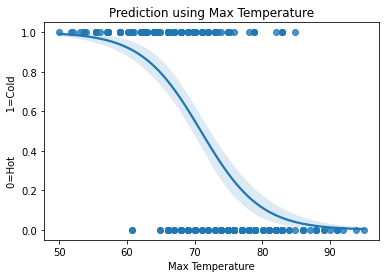

In [ ]:
t_max = [row[0] for row in X_train]
graph = sns.regplot(x=t_max, y=y_train,logistic=True)
graph.set_xlabel("Max Temperature")
graph.set_ylabel("0=Hot              1=Cold")
graph.set_title("Prediction using Max Temperature")

The graph above shows that there exists some relationship between the max temperature and what the lowest temperature was that day in ways of prediction. This was also displayed in my Project 2.

Text(0.5, 1.0, 'Prediction using Precipitation')

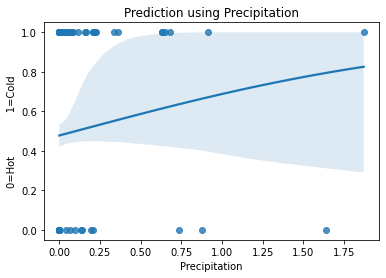

In [ ]:
prcp = [row[1] for row in X_train]
graph = sns.regplot(x=prcp, y=y_train,logistic=True)
graph.set_xlabel("Precipitation")
graph.set_ylabel("0=Hot              1=Cold")
graph.set_title("Prediction using Precipitation")

The graph above shows that there is not that good of a relation between precipitation and the minimum temperature. Even though, I thought that rain doesn't happen on warm days in San Jose, it seems to not be a very conclusive measure of the temperature.

Text(0.5, 1.0, 'Prediction using Wind Speed')

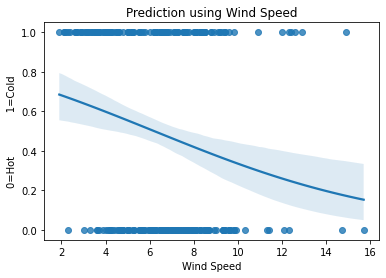

In [ ]:
wind = [row[2] for row in X_train]
graph = sns.regplot(x=wind, y=y_train,logistic=True)
graph.set_xlabel("Wind Speed")
graph.set_ylabel("0=Hot              1=Cold")
graph.set_title("Prediction using Wind Speed")

The graph above shows that there seems to be very little relation between the wind speed and actual minimum temperature. Even though the wind makes me feel colder, it doesn't actually reduce the temperature.

For the next step, I split the data into warmer and colder minimum temperatures so that I can compute things like accuracy, F1 and generate a confusion matrix.

False == warmer

True == colder

In [ ]:
#split data using binary split:

colder = y_test 
colder_df = pd.DataFrame(colder)
print("count of actual warmer(False) and colder(True) minimum temperatures")
print(colder_df[0].value_counts())


count of actual warmer(False) and colder(True) minimum temperatures
False    38
True     35
Name: 0, dtype: int64


Now I do the same with the predictions, just to do an initial comparison between the two

In [ ]:
colder_predict = y_predict
colder_predict_df = pd.DataFrame(colder_predict)

print("count of predicted warmer(False) and colder(True) minimum temperatures")
print(colder_predict_df[0].value_counts())

count of predicted warmer(False) and colder(True) minimum temperatures
True     37
False    36
Name: 0, dtype: int64


Next, I count the number of true/false positives and true/false negatives by iterating through both arrays

In [ ]:
test_length = len(y_test)

true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

# counting true/false positve and true/false negatives:

for i in range(test_length):
  if colder[i] == False and colder_predict[i] == False:
    true_negative = true_negative + 1
  elif colder[i] == True and colder_predict[i] == True:
    true_positive = true_positive + 1
  elif colder[i] == False and colder_predict[i] == True:
    false_positive = false_positive + 1
  elif colder[i] == True and colder_predict[i] == False:
    false_negative = false_negative + 1

Tabulating data to make a Confusion Matrix:

In [ ]:
print("Confusion Matrix: \n")

result_table = [["","PREDICTED COLDER = True", "PREDICTED COLDER = False"], ["ACTUAL COLDER = True", true_positive, false_negative],
                ["ACTUAL COLDER = False", false_positive, true_negative]]
print(tabulate(result_table))

Confusion Matrix: 

---------------------  -----------------------  ------------------------
                       PREDICTED COLDER = True  PREDICTED COLDER = False
ACTUAL COLDER = True   29                       6
ACTUAL COLDER = False  8                        30
---------------------  -----------------------  ------------------------


Calculating accuracy:

In [ ]:
accuracy = (true_positive + true_negative) / test_length

print("accuracy =", accuracy)

accuracy = 0.8082191780821918


Calculating precision and recall:

In [ ]:
precision = true_positive / (true_positive + false_positive)

recall = true_positive / (true_positive + false_negative)

print("precision = ", precision)

print("recall = ", recall)

precision =  0.7837837837837838
recall =  0.8285714285714286


Calculating $F_1$:

In [ ]:
f_1 = 2 / (1/recall + 1/precision)
print("f_1 =", f_1)

f_1 = 0.8055555555555556
